# Exploratory Data Analysis

In [1]:
import sys
import os
import warnings
warnings.filterwarnings('ignore')
sys.path.append('../scripts')
from data_loader import *
from eda import *

## Load Datasets

In [2]:
# path to the CSV file
filename1 = 'brent_oil_price.parquet'
filename2 = 'gdp_rate.parquet'

path1 = os.path.join('..', 'data/processed', filename1)
path2 = os.path.join('..', 'data/processed', filename2)

# Load dataset
brent_oil_df = load_data(path1)
gdp_data = load_data(path2)

## Brent Oil Time Series Plot

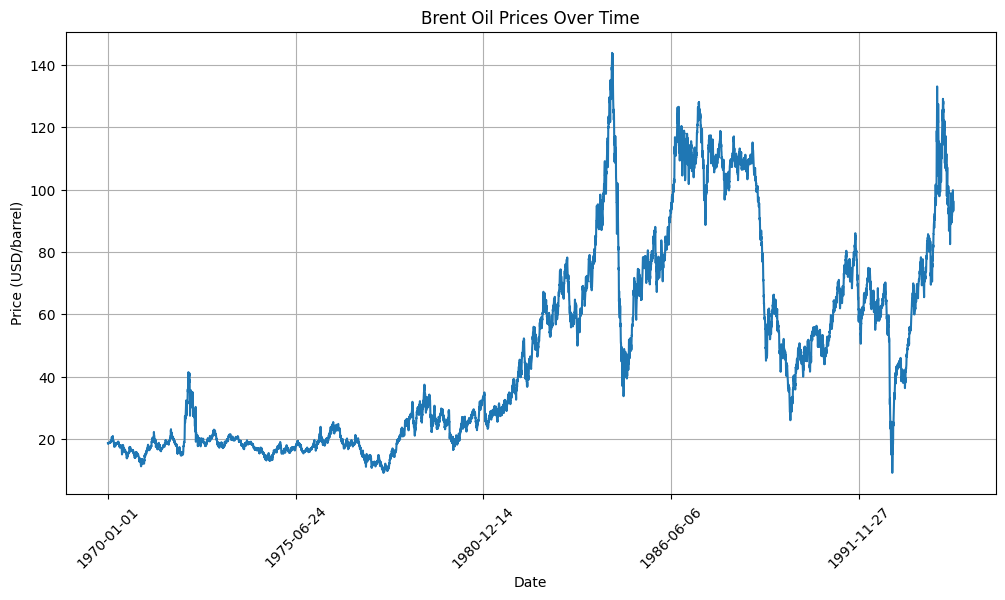

In [3]:
plot_brent_oil_prices(brent_oil_df)

# Summary statistics

In [4]:
summary_stats = brent_oil_df['Price'].describe()
display(summary_stats)

count    9011.000000
mean       48.420782
std        32.860110
min         9.100000
25%        19.050000
50%        38.570000
75%        70.090000
max       143.950000
Name: Price, dtype: float64

## Distribution of Brent oil prices 

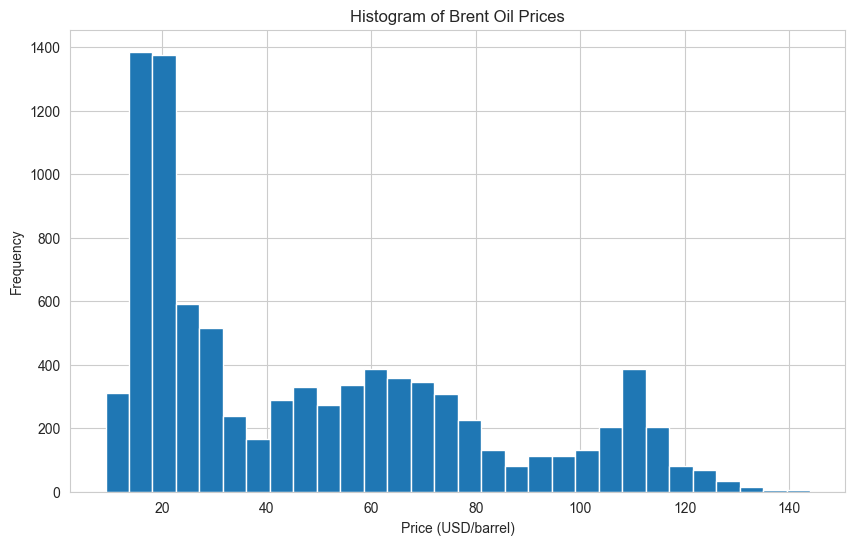

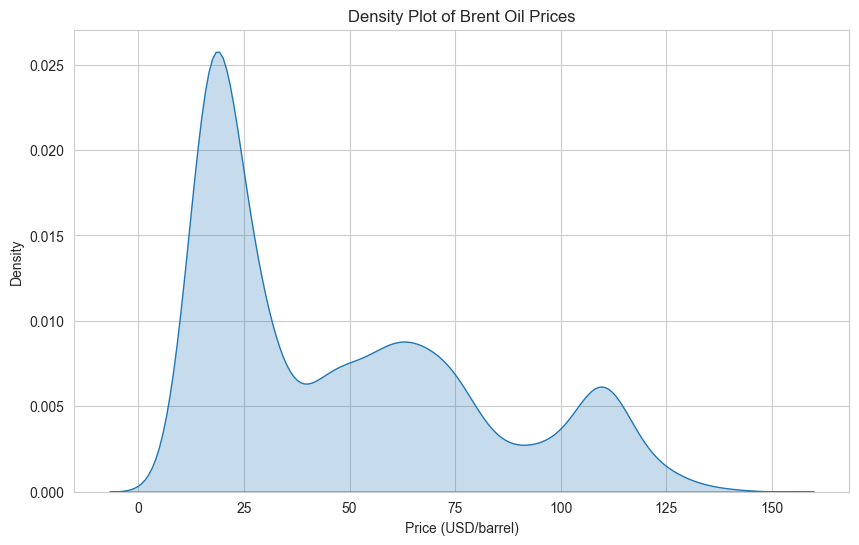

In [3]:
analyze_brent_oil_price_distribution(brent_oil_df)

##  Stationarity Analysis

In [3]:
# Check the stationarity of the Brent oil price time series
diff_level = check_stationarity(brent_oil_df)
diff_level

The Brent oil price time series is non-stationary.
The Brent oil price time series becomes stationary after 1 level(s) of differencing.


1

## Visualize the ACF and PACF plots

<Figure size 1000x600 with 0 Axes>

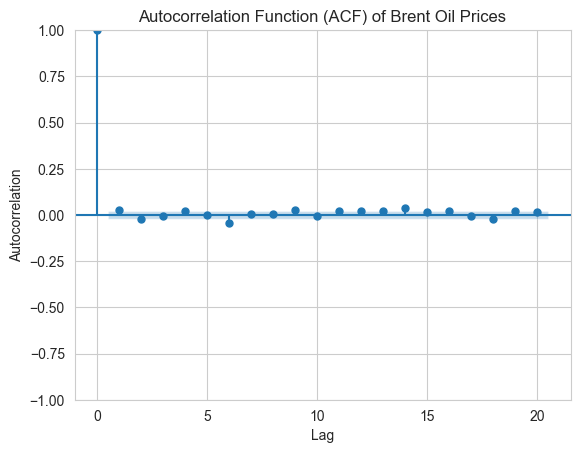

<Figure size 1000x600 with 0 Axes>

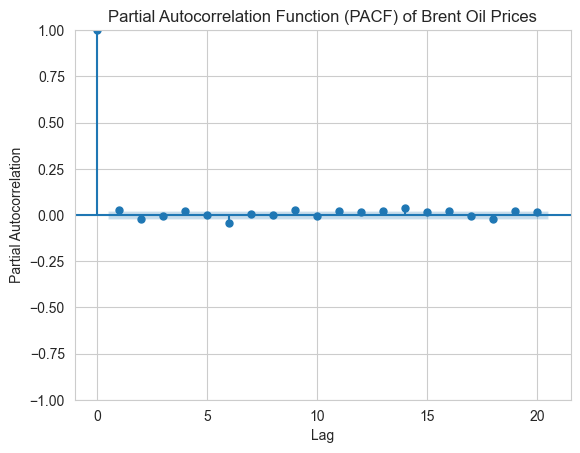

In [4]:
visualize_acf_pacf(brent_oil_df, diff_level)

## Exploring Other Potential Factors Influencing Oil Prices

### Correlation between GDP growth rates of major economies and oil prices

In [3]:
gdp_data

,Country,1987,1988,1989,1990,1991,1992,1993,1994,1995,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Brazil,3.6,0.3,3.2,-4.2,1.0,-0.5,4.7,5.3,4.4,...,3.0,0.5,-3.5,-3.3,1.3,1.8,1.2,-3.3,4.8,3.0
1,Canada,4.1,4.4,2.3,0.2,-2.1,0.9,2.7,4.5,2.7,...,2.3,2.9,0.6,1.0,3.0,2.7,1.9,-5.0,5.3,3.8
2,China,11.7,11.2,4.2,3.9,9.0,14.3,13.9,13.0,11.0,...,7.8,7.4,7.0,6.9,6.9,6.8,6.0,2.2,8.4,3.0
3,France,2.6,4.7,4.3,2.9,1.0,1.6,-0.6,2.4,2.1,...,0.6,1.0,1.1,1.1,2.3,1.9,1.8,-7.5,6.3,2.5
4,Germany,1.5,3.7,3.9,5.7,5.0,1.9,-1.0,2.4,1.5,...,0.4,2.2,1.5,2.2,2.7,1.0,1.1,-3.8,3.2,1.8
5,Italy,3.2,4.2,3.4,2.1,1.4,0.8,-0.9,2.2,2.9,...,-1.8,0.0,0.8,1.3,1.7,0.9,0.5,-9.0,8.3,4.0
6,Japan,4.6,6.7,4.9,4.8,3.5,0.9,-0.5,1.1,2.6,...,2.0,0.3,1.6,0.8,1.7,0.6,-0.4,-4.1,2.6,1.0
7,United Kingdom,5.4,5.4,2.4,0.6,-1.4,0.2,2.3,3.4,2.4,...,1.8,3.2,2.2,1.9,2.7,1.4,1.6,-10.4,8.7,4.3
8,United States,3.5,4.2,3.7,1.9,-0.1,3.5,2.8,4.0,2.7,...,2.1,2.5,2.9,1.8,2.5,3.0,2.5,-2.2,5.8,1.9


## Transpose the data

In [4]:
gdp_data = gdp_data.set_index('Country').transpose()

# Convert the index to datetime format
gdp_data.index = pd.to_datetime(gdp_data.index + '-12-31', format='%Y-%m-%d')
gdp_data = gdp_data.rename_axis('Date')

In [5]:
gdp_data.head()

Country,Brazil,Canada,China,France,Germany,Italy,Japan,United Kingdom,United States
Date,,,,,,,,,
1987-12-31,3.6,4.1,11.7,2.6,1.5,3.2,4.6,5.4,3.5
1988-12-31,0.3,4.4,11.2,4.7,3.7,4.2,6.7,5.4,4.2
1989-12-31,3.2,2.3,4.2,4.3,3.9,3.4,4.9,2.4,3.7
1990-12-31,-4.2,0.2,3.9,2.9,5.7,2.1,4.8,0.6,1.9
1991-12-31,1.0,-2.1,9.0,1.0,5.0,1.4,3.5,-1.4,-0.1


In [6]:
brent_oil_df['Date'] = pd.to_datetime(brent_oil_df['Date'])

brent_oil_df.set_index('Date', inplace=True)

# Resample Brent oil price data to yearly frequency
df_yearly = brent_oil_df.resample('Y').mean()

df_yearly.head()

,Price
Date,
1987-12-31,18.525813
1988-12-31,14.905412
1989-12-31,18.228228
1990-12-31,23.761445
1991-12-31,20.041128


## Merge the two datasets on the date

In [7]:
merged_data = pd.merge(df_yearly, gdp_data, left_index=True, right_index=True, how='inner')
merged_data.head()

,Price,Brazil,Canada,China,France,Germany,Italy,Japan,United Kingdom,United States
Date,,,,,,,,,,
1987-12-31,18.525813,3.6,4.1,11.7,2.6,1.5,3.2,4.6,5.4,3.5
1988-12-31,14.905412,0.3,4.4,11.2,4.7,3.7,4.2,6.7,5.4,4.2
1989-12-31,18.228228,3.2,2.3,4.2,4.3,3.9,3.4,4.9,2.4,3.7
1990-12-31,23.761445,-4.2,0.2,3.9,2.9,5.7,2.1,4.8,0.6,1.9
1991-12-31,20.041128,1.0,-2.1,9.0,1.0,5.0,1.4,3.5,-1.4,-0.1


In [8]:
# Define output folder and file name
output_folder = os.path.join('..', 'data', 'processed')
filename = 'merged_oil_gdp_rate.parquet'

output_path = save_data(merged_data, output_folder, filename)

Dataset saved to ..\data\processed\merged_oil_gdp_rate.parquet


In [3]:
# path to the CSV file
filename1 = 'merged_oil_gdp_rate.parquet'


path1 = os.path.join('..', 'data/processed', filename1)
# Load dataset
merged_data = load_data(path1)

In [4]:
merged_data.head()

,Price,Brazil,Canada,China,France,Germany,Italy,Japan,United Kingdom,United States
Date,,,,,,,,,,
1987-12-31,18.525813,3.6,4.1,11.7,2.6,1.5,3.2,4.6,5.4,3.5
1988-12-31,14.905412,0.3,4.4,11.2,4.7,3.7,4.2,6.7,5.4,4.2
1989-12-31,18.228228,3.2,2.3,4.2,4.3,3.9,3.4,4.9,2.4,3.7
1990-12-31,23.761445,-4.2,0.2,3.9,2.9,5.7,2.1,4.8,0.6,1.9
1991-12-31,20.041128,1.0,-2.1,9.0,1.0,5.0,1.4,3.5,-1.4,-0.1


                   Price    Brazil    Canada     China    France   Germany  \
Price           1.000000  0.191112 -0.041023 -0.195882 -0.146652 -0.047986   
Brazil          0.191112  1.000000  0.534353  0.519732  0.340041  0.163162   
Canada         -0.041023  0.534353  1.000000  0.277877  0.807043  0.447600   
China          -0.195882  0.519732  0.277877  1.000000  0.175919  0.047597   
France         -0.146652  0.340041  0.807043  0.175919  1.000000  0.743587   
Germany        -0.047986  0.163162  0.447600  0.047597  0.743587  1.000000   
Italy          -0.214073  0.336034  0.745425  0.165416  0.940203  0.730404   
Japan          -0.218081  0.196225  0.438525  0.125893  0.667687  0.740261   
United Kingdom -0.069911  0.415623  0.901771  0.279230  0.880076  0.527839   
United States  -0.274190  0.300674  0.851988  0.258846  0.801546  0.489638   

                   Italy     Japan  United Kingdom  United States  
Price          -0.214073 -0.218081       -0.069911      -0.274190  
Brazi

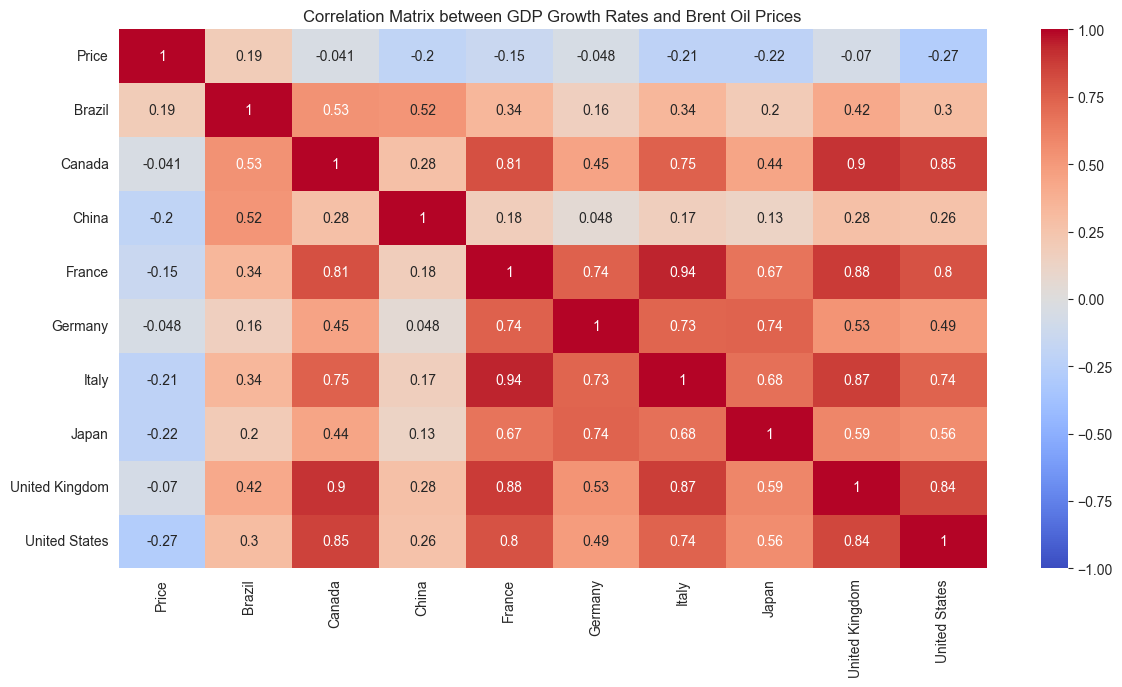

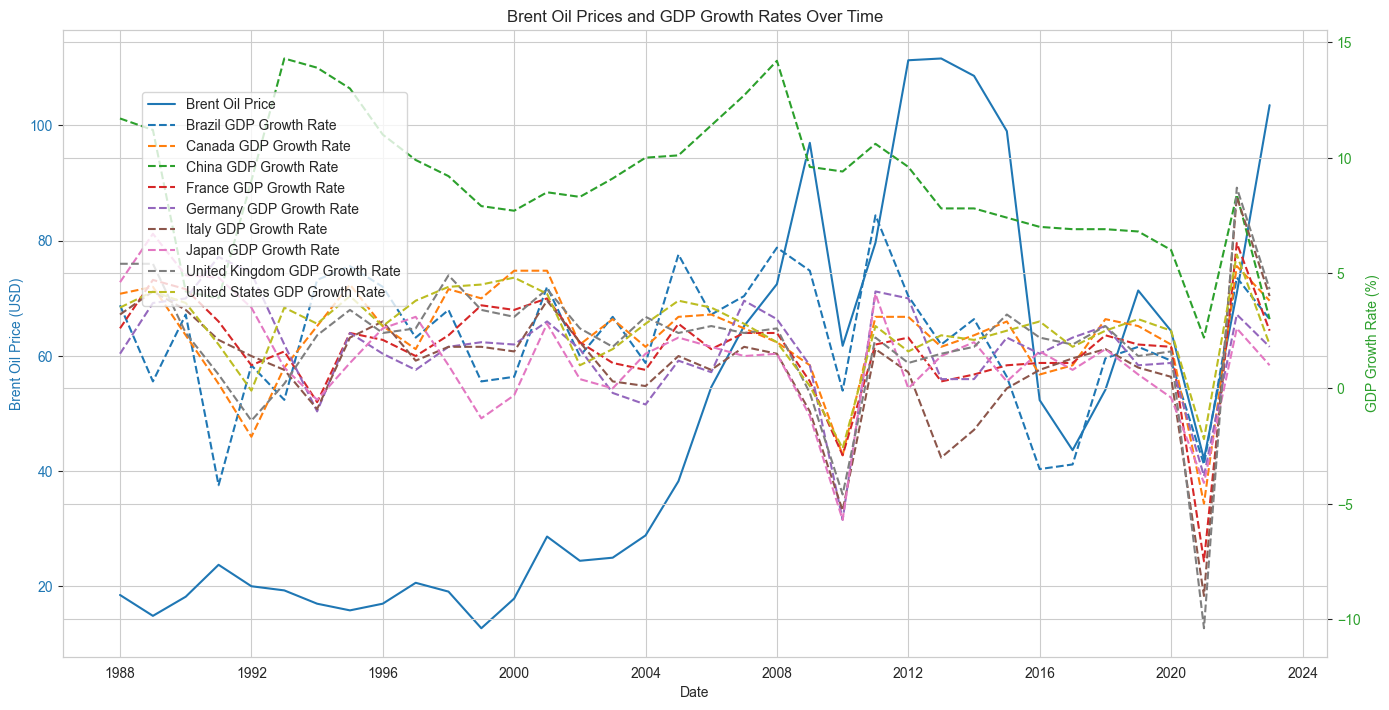

In [5]:
analyze_gdp_and_oil_prices(merged_data)